# Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("..")
from app import load_dataset, partition_data
 

##### Load Dataset into dataframe

In [2]:
# Load Dataset
data = load_dataset("../storage/u.data", separation_type="\t")
data.columns = ["user_id", "item_id", "rating", "timestamp"]
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

print(f"Dataset shape: {data.shape}")
display(data.head())

Dataset shape: (100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


##### Partitioning the data and visualizing rating distributions and timestamp distributions.

In [19]:
# Partition Data by user_id
train_data_by_user, test_data_by_user = partition_data(data, split=.8, partition_type='stratified', stratify_by='user_id')
print(f"Total number of unqiue users: {data['user_id'].nunique()}")
print(f"Number of unique users in Train Data: {train_data_by_user['user_id'].nunique()}")
print(f"Number of unique users in Test Data: {test_data_by_user['user_id'].nunique()}")

Total number of unqiue users: 943
Number of unique users in Train Data: 754
Number of unique users in Test Data: 189


/var/folders/fq/0xjz36w967z3cc3t1d4ps49w0000gn/T/ipykernel_21173/3257038002.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
/var/folders/fq/0xjz36w967z3cc3t1d4ps49w0000gn/T/ipykernel_21173/3257038002.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)


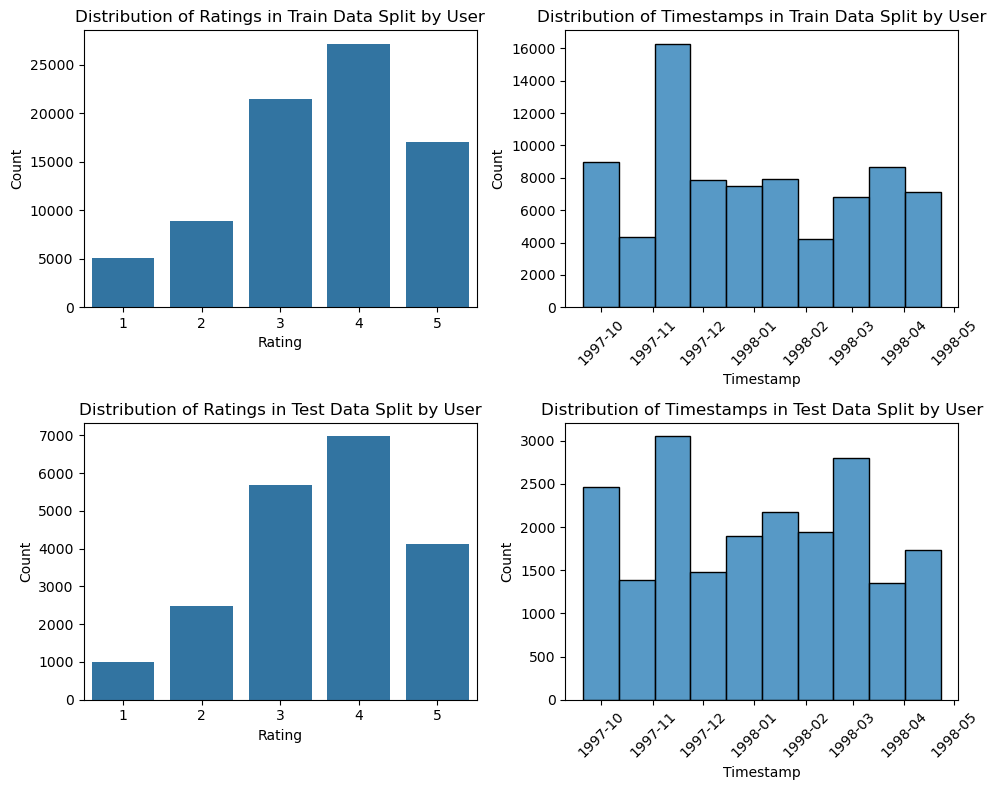

In [21]:
# Visualize Ratings and Timestamp Distribution
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))   
axs = axs.flatten() 

sns.countplot(x='rating', data=train_data_by_user, ax=axs[0])
axs[0].set_title('Distribution of Ratings in Train Data Split by User')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Count')

sns.histplot(x='timestamp', data=train_data_by_user, bins=10, ax=axs[1])
axs[1].set_title('Distribution of Timestamps in Train Data Split by User')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

sns.countplot(x='rating', data=test_data_by_user, ax=axs[2])
axs[2].set_title('Distribution of Ratings in Test Data Split by User')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Count')

sns.histplot(x='timestamp', data=test_data_by_user, bins=10, ax=axs[3])
axs[3].set_title('Distribution of Timestamps in Test Data Split by User')
axs[3].set_xlabel('Timestamp')
axs[3].set_ylabel('Count')
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)

plt.tight_layout()

In [23]:
# Partition Data by temporal split
train_data_by_time, test_data_by_time = partition_data(data, split=.8, partition_type='temporal')
print(f"Timestamp range in original dataset: {data['timestamp'].min()} to {data['timestamp'].max()}")
print(f"Timestamp range in train dataset: {train_data_by_time['timestamp'].min()} to {train_data_by_time['timestamp'].max()}")
print(f"Timestamp range in test dataset: {test_data_by_time['timestamp'].min()} to {test_data_by_time['timestamp'].max()}")

Timestamp range in original dataset: 1997-09-20 03:05:10 to 1998-04-22 23:10:38
Timestamp range in train dataset: 1997-09-20 03:05:10 to 1998-03-07 02:21:09
Timestamp range in test dataset: 1998-03-07 02:21:09 to 1998-04-22 23:10:38


/var/folders/fq/0xjz36w967z3cc3t1d4ps49w0000gn/T/ipykernel_21173/2512041356.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
/var/folders/fq/0xjz36w967z3cc3t1d4ps49w0000gn/T/ipykernel_21173/2512041356.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)


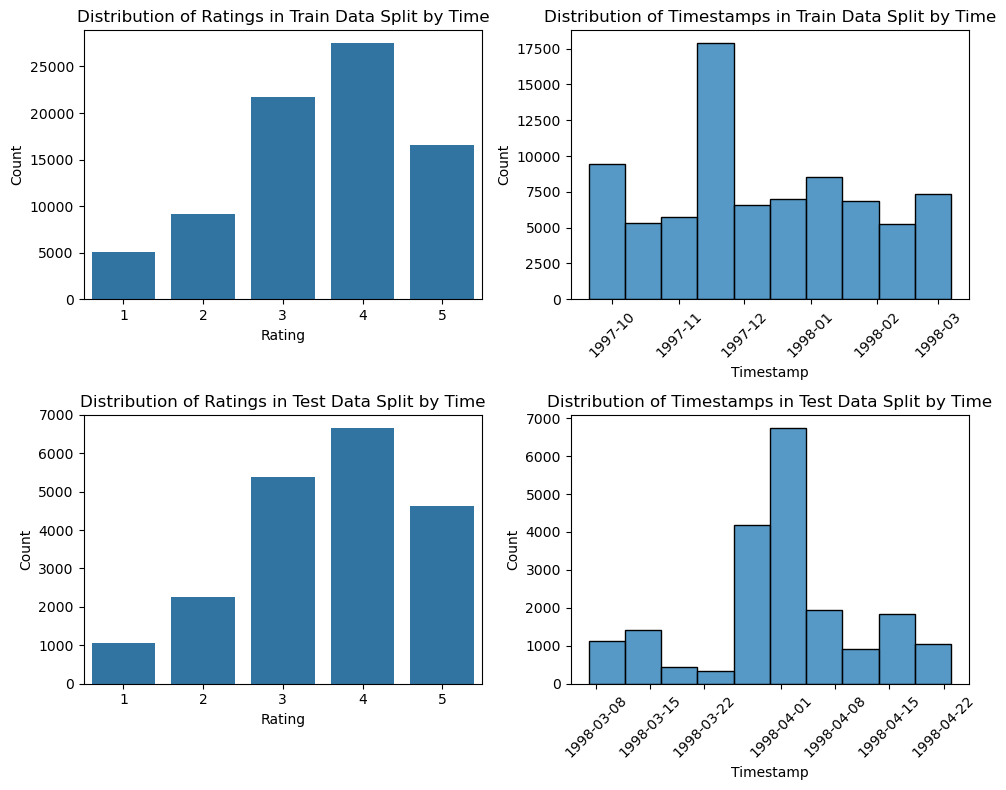

In [22]:
# Visualize Ratings and Timestamp Distribution
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))   
axs = axs.flatten() 

sns.countplot(x='rating', data=train_data_by_time, ax=axs[0])
axs[0].set_title('Distribution of Ratings in Train Data Split by Time')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Count')

sns.histplot(x='timestamp', data=train_data_by_time, bins=10, ax=axs[1])
axs[1].set_title('Distribution of Timestamps in Train Data Split by Time')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

sns.countplot(x='rating', data=test_data_by_time, ax=axs[2])
axs[2].set_title('Distribution of Ratings in Test Data Split by Time')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Count')

sns.histplot(x='timestamp', data=test_data_by_time, bins=10, ax=axs[3])
axs[3].set_title('Distribution of Timestamps in Test Data Split by Time')
axs[3].set_xlabel('Timestamp')
axs[3].set_ylabel('Count')
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)

plt.tight_layout()